**ARTIFICIAL NEURAL NETWORK - CAR SALES PRICE PREDICTION - SAMADHAN PISAL**

**Main Context:-**

Here we create a model that can estimate the overall amount that consumers would spend given the following characteristics:

1) Customer name
2) Customer email
3) Country
4) Gender
5) Age
6) Annual salary
7) Credit card debt
8) net worth


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import warnings
warnings.filterwarnings("ignore")

In [29]:
df = pd.read_csv("/content/ANN_Car_Sales_Price.csv", encoding='ISO-8859-15')

'''
here we have Reads the CSV file named "ANN_Car_Sales_Price.csv" located at the "/content/" path into a pandas DataFrame named 'df'.
The 'encoding' parameter is set to 'ISO-8859-15', indicating the character encoding of the CSV file'''

df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [3]:
df.shape # Checked size of dataset

(500, 9)

In [4]:
df.info() # Checked missing Value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [5]:
df.duplicated().sum()#checked if any row are duplicate or not

0

In [6]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [7]:
# Dropping the String columns
df.drop(columns=['customer name', 'customer e-mail', 'country', 'gender'], inplace=True)

'''
removing the specified columns ('customer name', 'customer e-mail', 'country', 'gender') from the DataFrame becuase these are not required for predication,
and the changes are applied directly to the original DataFrame due to inplace=True.
'''

In [30]:
df.corr()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
gender,1.000000,-0.064481,-0.036499,0.024193,-0.008395,-0.066408
age,-0.064481,1.000000,0.000130,0.034721,0.020356,0.632865
annual Salary,-0.036499,0.000130,1.000000,0.049599,0.014767,0.617862
credit card debt,0.024193,0.034721,0.049599,1.000000,-0.049378,0.028882
net worth,-0.008395,0.020356,0.014767,-0.049378,1.000000,0.488580
car purchase amount,-0.066408,0.632865,0.617862,0.028882,0.488580,1.000000


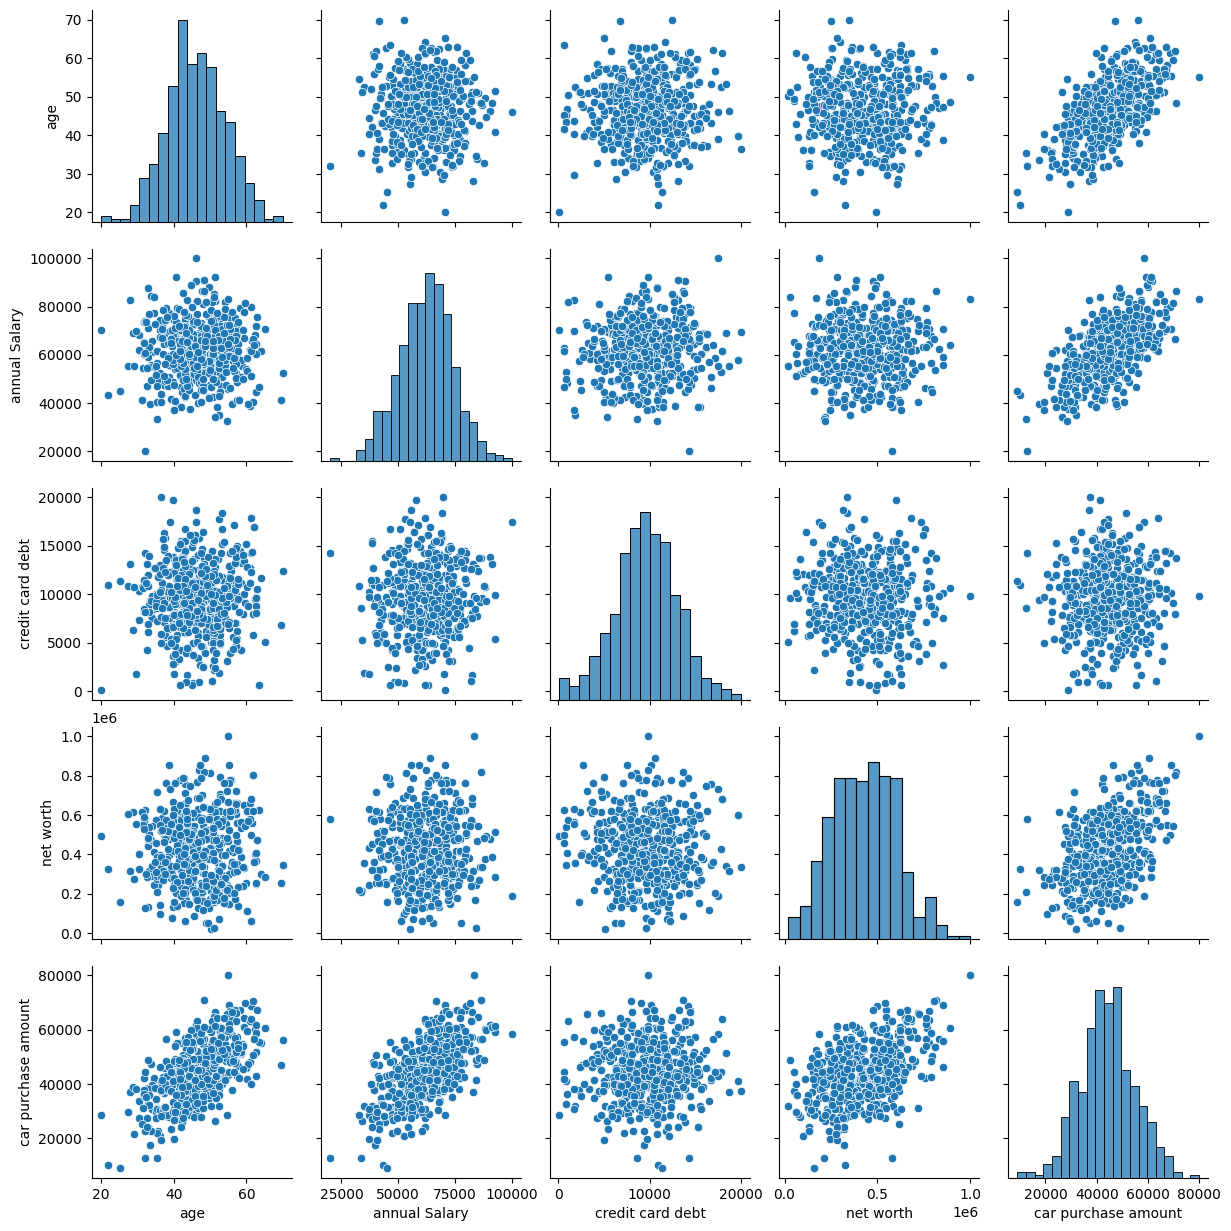

In [9]:
sns.pairplot(df)

'''
This function is useful for quickly visualizing the relationships between multiple variables in a dataset.
It's especially handy for identifying patterns, trends, or potential correlations.
'''

In [10]:
x = df.iloc[:, :-1] # Seperate all features from Datafarame
y = df.iloc[:, -1] # Separate target from Dataframe

In [11]:
x

,age,annual Salary,credit card debt,net worth
0,41.851720,62812.09301,11609.380910,238961.2505
1,40.870623,66646.89292,9572.957136,530973.9078
2,43.152897,53798.55112,11160.355060,638467.1773
3,58.271369,79370.03798,14426.164850,548599.0524
4,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...
495,41.462515,71942.40291,6995.902524,541670.1016
496,37.642000,56039.49793,12301.456790,360419.0988
497,53.943497,68888.77805,10611.606860,764531.3203
498,59.160509,49811.99062,14013.034510,337826.6382


In [12]:
y = y.values.reshape(-1,1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

x=scaler.fit_transform(x)
y=scaler.fit_transform(y)

'''
1) MinMax scaling (or Min-Max normalization) is a data preprocessing technique used in machine learning
and statistics to scale numerical features in a specific range, typically between 0 and 1.
The purpose of MinMax scaling is to ensure that all features contribute equally to the computation,
especially in algorithms that rely on distances between data points, like k-nearest neighbors or support vector machines.
2) Fit trasform scaled data to x & y
'''

In [14]:
y

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

This line of code is using the train_test_split function from the sklearn.model_selection module in Python. This function is commonly used in machine learning to split a dataset into two subsets: one for training the model and another for testing the model's performance.

x and y are the input features and corresponding labels respectively of your dataset.

test_size=0.2 specifies that 20% of the data will be used for testing the model, and the remaining 80% will be used for training. This is a common split ratio, but you can adjust it based on your specific use case.

random_state=1 is an optional parameter that sets the random seed for the random number generator. This ensures that every time you run the code, the data is split in the same way. Setting a random seed is important for reproducibility; it allows you to obtain the same train-test split every time you run the code.

After this line of code is executed,data will split into four variables:

x_train: This variable contains the input features for the training set.

x_test: This variable contains the input features for the testing set.

y_train: This variable contains the corresponding labels for the training set.

y_test: This variable contains the corresponding labels for the testing set.

These variables are then typically used to train a machine learning model on the x_train and y_train data and evaluate the model's performance on the x_test and y_test data. This division is essential for assessing how well the trained model generalizes to unseen data.


In [16]:
x_train

array([[0.5919433 , 0.28041933, 0.36359421, 0.37352798],
       [0.61344528, 0.64901813, 0.31429008, 0.15276966],
       [0.72431504, 0.46742286, 0.27777908, 0.39982759],
       ...,
       [0.29363923, 0.80213959, 0.63415297, 0.22888834],
       [0.62336278, 0.46847974, 0.10704002, 0.14181603],
       [0.40284696, 0.63935253, 0.39284678, 0.40491578]])

In [17]:
y_train

array([[0.36116341],
       [0.51912329],
       [0.56863909],
       [0.36815842],
       [0.28064374],
       [0.39967091],
       [0.60481233],
       [0.53534616],
       [0.76110147],
       [0.32165106],
       [0.61562087],
       [0.54133778],
       [0.42831636],
       [0.54948752],
       [0.59220313],
       [0.37288737],
       [0.65775822],
       [0.6825565 ],
       [0.64966102],
       [0.73050372],
       [0.32481193],
       [0.55963883],
       [0.33988067],
       [0.56275857],
       [0.34882593],
       [0.49908428],
       [0.33433524],
       [0.49805458],
       [0.54888405],
       [0.52679628],
       [0.54146119],
       [0.46494647],
       [0.47531745],
       [0.55070832],
       [0.50332973],
       [0.4556686 ],
       [0.43805795],
       [0.51865585],
       [0.        ],
       [0.42988917],
       [0.665203  ],
       [0.55305289],
       [0.61959897],
       [0.3966416 ],
       [0.46457217],
       [0.66078116],
       [0.43107389],
       [0.512

In [18]:
x_test

array([[0.59912029, 0.50670255, 0.40926986, 0.15620324],
       [0.50520728, 0.60624618, 0.77069345, 0.29433251],
       [0.4175075 , 0.48825108, 0.28852322, 0.11872072],
       [0.65220091, 0.70398599, 0.31619153, 0.22981242],
       [0.37091667, 0.48290736, 0.59976738, 0.50695645],
       [0.66579536, 0.55827876, 0.56412233, 0.47085044],
       [0.53041284, 0.66877656, 0.55439161, 0.76093021],
       [0.69759089, 0.55537592, 0.34291994, 0.65802246],
       [0.71979231, 0.2436057 , 0.54735346, 0.35057265],
       [0.27550539, 0.44471051, 0.4671361 , 0.46441441],
       [0.5609019 , 0.45147995, 0.45943598, 0.57828313],
       [0.73545895, 0.48960009, 0.52132874, 0.61580367],
       [0.4079459 , 0.6399216 , 0.18868006, 0.7579921 ],
       [0.56513113, 0.83206446, 0.68350753, 0.81530834],
       [0.54894148, 0.25432581, 0.57316076, 0.24073722],
       [0.48465112, 0.31880936, 0.4595712 , 0.36201805],
       [0.4660937 , 0.61151753, 0.40302535, 0.50511457],
       [0.85251508, 0.55617994,

In [19]:
y_test

array([[0.4219045 ],
       [0.4845291 ],
       [0.28757249],
       [0.60775236],
       [0.41187412],
       [0.61996151],
       [0.72573208],
       [0.7118085 ],
       [0.40442699],
       [0.31409216],
       [0.53305254],
       [0.67567861],
       [0.63371047],
       [0.8715253 ],
       [0.26605566],
       [0.3172683 ],
       [0.54900684],
       [0.69953618],
       [0.46999496],
       [0.01538345],
       [0.55660425],
       [0.39694511],
       [0.5257114 ],
       [0.26178477],
       [0.84401542],
       [0.49152498],
       [0.48453965],
       [0.53113416],
       [0.74075381],
       [0.69345654],
       [0.55657526],
       [0.47313925],
       [0.64444254],
       [0.47569515],
       [0.76168793],
       [0.71996731],
       [0.37628608],
       [0.71808681],
       [0.47597174],
       [0.47883335],
       [0.71302854],
       [0.35515157],
       [0.30168732],
       [0.39864179],
       [0.45573492],
       [0.50866938],
       [0.50109082],
       [0.626

In [20]:
import tensorflow #Library
from tensorflow import keras #Module
from keras import Sequential #Class
from keras.layers import Dense
#Dense layer is a fully connected layer, meaning that each neuron in the layer is connected to every neuron in the previous layer.

In [21]:
model=Sequential()

model.add(Dense(4,activation="relu",input_dim=4))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="linear"))

-The Sequential() function initializes a linear stack of layers for building the neural network.

-The first Dense layer has 4 units (neurons), uses the ReLU (Rectified Linear Unit) activation function, and specifies an input dimension of 4.

This implies that the input data fed into the model is expected to have four features.

-The second Dense layer also has 4 units and uses the ReLU activation function.

This layer is connected to the previous layer, and Keras automatically infers the input dimensions from the previous layer.

-The third and final Dense layer has 1 unit and uses the linear activation function.

This layer serves as the output layer, and the use of a linear activation function suggests that the network is intended for regression tasks, as linear activation outputs the raw weighted sum of inputs.

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 45 (180.00 Byte)
Trainable params: 45 (180.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


The function model.summary() is typically used in machine learning frameworks like TensorFlow or Keras to display a concise summary of the architecture of a neural network model. This summary provides a quick overview of the layers in the model, along with the number of parameters and the output shapes at each layer.


In [23]:
model.compile(loss="mean_squared_error",optimizer="Adam")

In [24]:
history = model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 25ms/step - loss: 0.1841 - val_loss: 0.1880
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.1440 - val_loss: 0.1492
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.1107 - val_loss: 0.1180
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0849 - val_loss: 0.0927
Epoch 5/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0639 - val_loss: 0.0729
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0481 - val_loss: 0.0575
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0368 - val_loss: 0.0459
Epoch 8/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0286 - val_loss: 0.0378
Epoch 9/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0234 - val_loss: 0.0325
Epoch 10/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0203 - val_loss: 0.0291
Epoch 11

In [25]:
y_pred = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [26]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6736372477519756

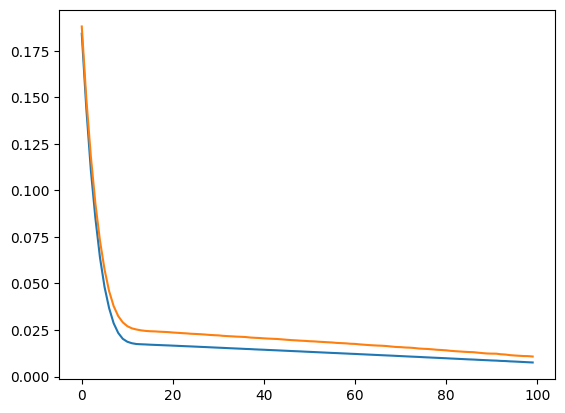

In [28]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])